In [2]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, PowerTransformer
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns



sk.set_config(display='diagram')

# Functions

# Load Data

In [3]:
df = pd.read_csv('./data/Teams.csv')
df = df[['W','R','H','2B','3B','HR','BB','SO','SB','CS','RA','ER','ERA']]
df = df.select_dtypes(include=np.number)
df = df.dropna()
df.head()

,W,R,H,2B,3B,HR,BB,SO,SB,CS,RA,ER,ERA
0,20,401,426,70,37,3,60.0,19.0,73.0,16.0,303,109,3.55
1,19,302,323,52,21,10,60.0,22.0,69.0,21.0,241,77,2.76
2,10,249,328,35,40,7,26.0,25.0,18.0,8.0,341,116,4.11
3,7,137,178,19,8,2,33.0,9.0,16.0,4.0,243,97,5.17
4,16,302,403,43,21,1,33.0,15.0,46.0,15.0,313,121,3.72


In [4]:
df.isnull().sum() / len(df)

W      0.0
R      0.0
H      0.0
2B     0.0
3B     0.0
HR     0.0
BB     0.0
SO     0.0
SB     0.0
CS     0.0
RA     0.0
ER     0.0
ERA    0.0
dtype: float64

<Axes: >

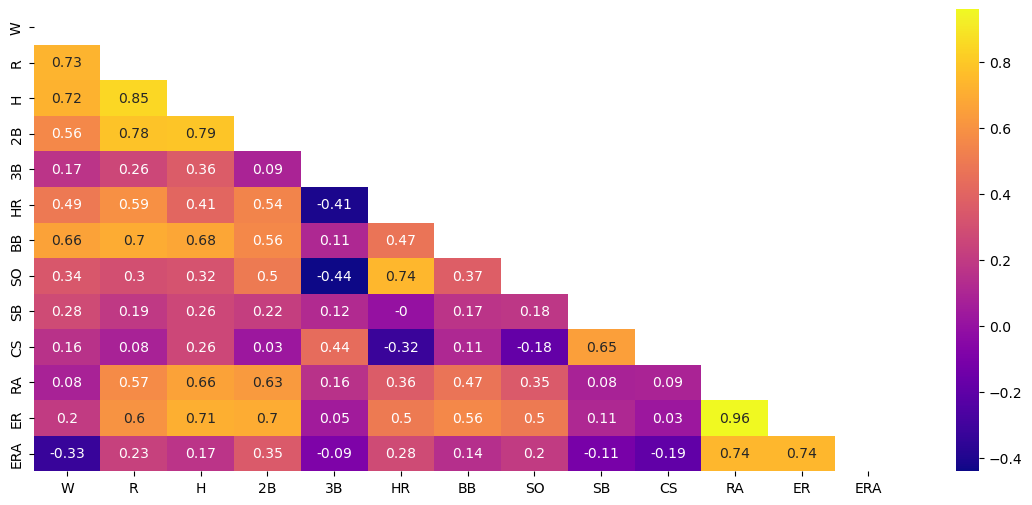

In [5]:
plt.figure(figsize=(14,6))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr().round(2), annot=True, mask=mask, cmap="plasma")

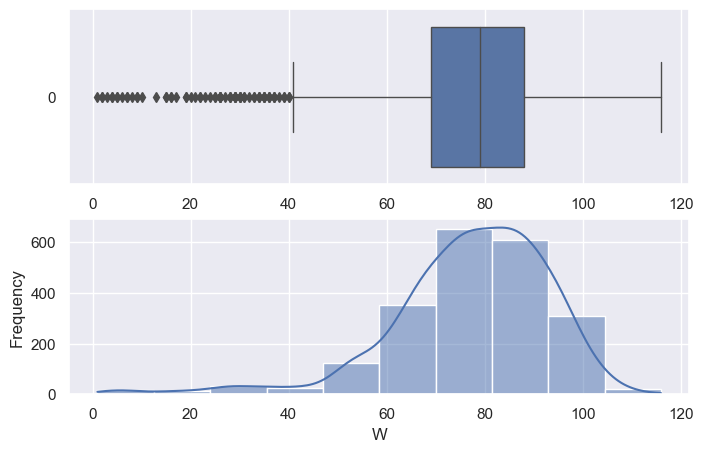

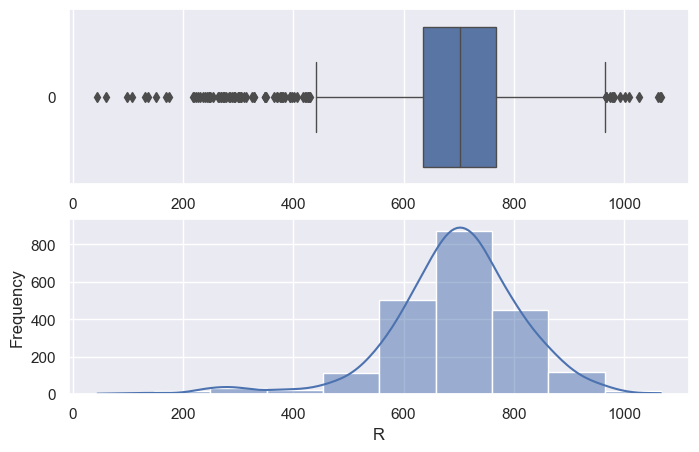

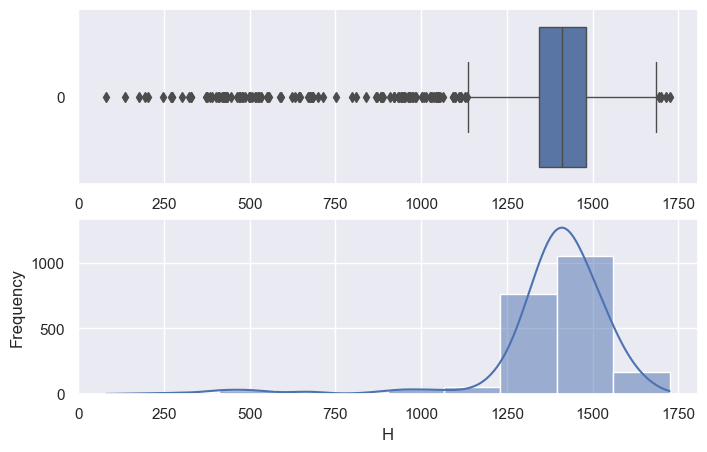

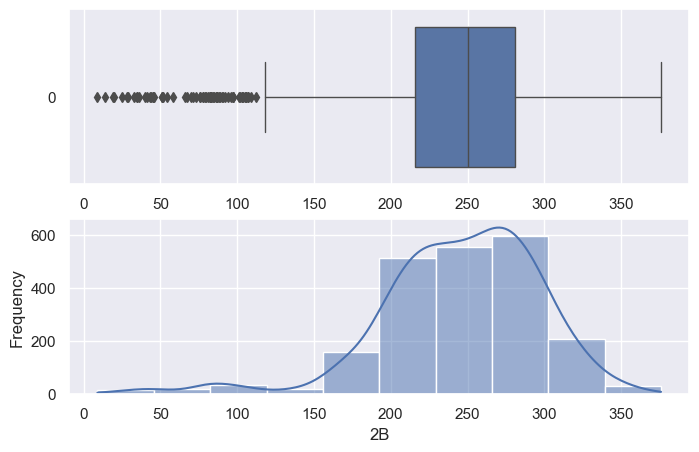

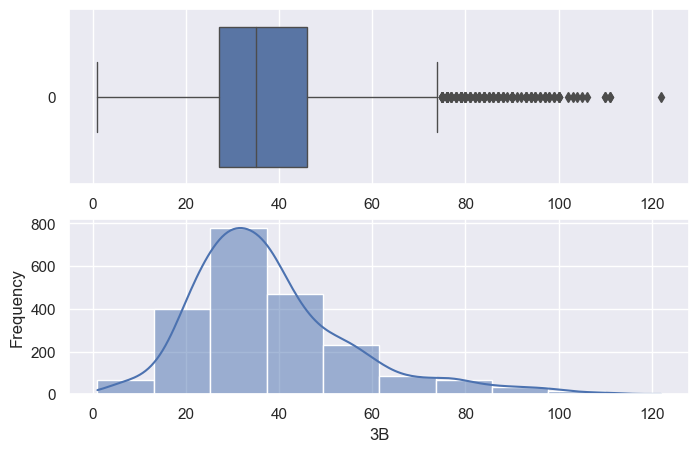

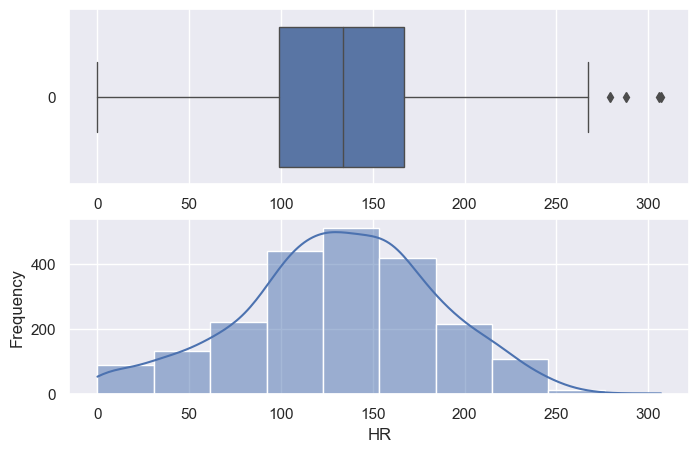

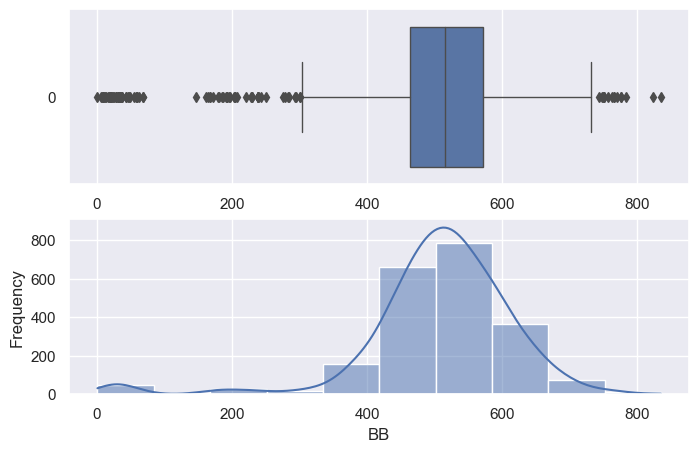

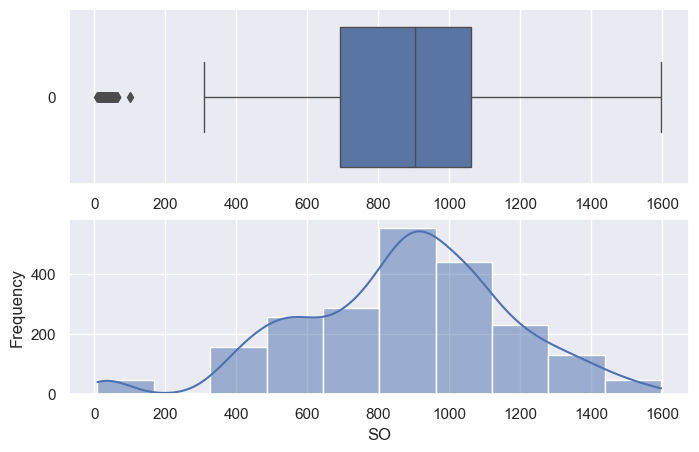

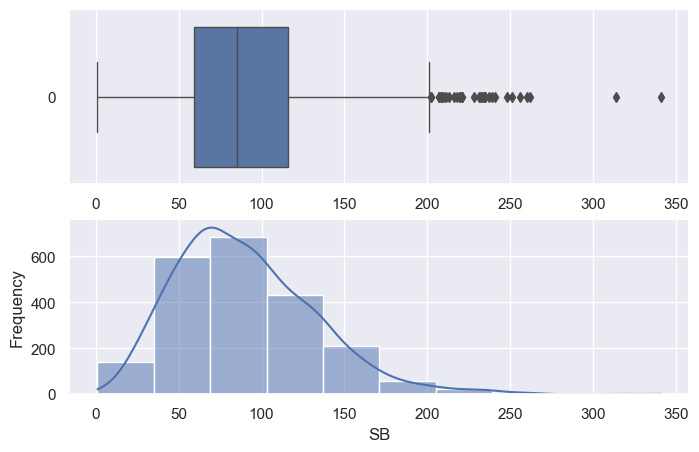

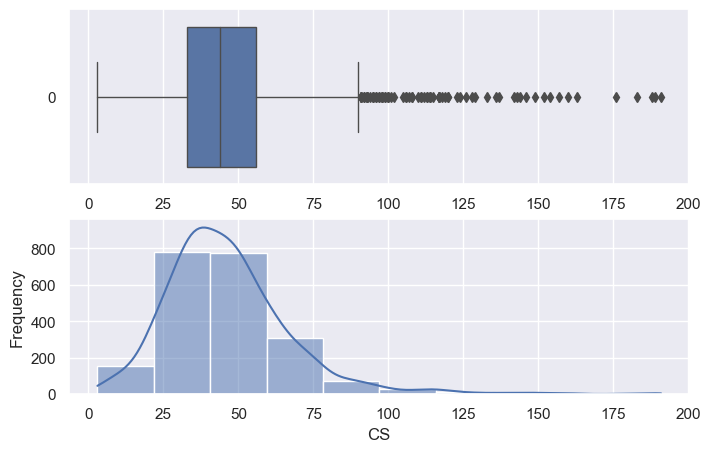

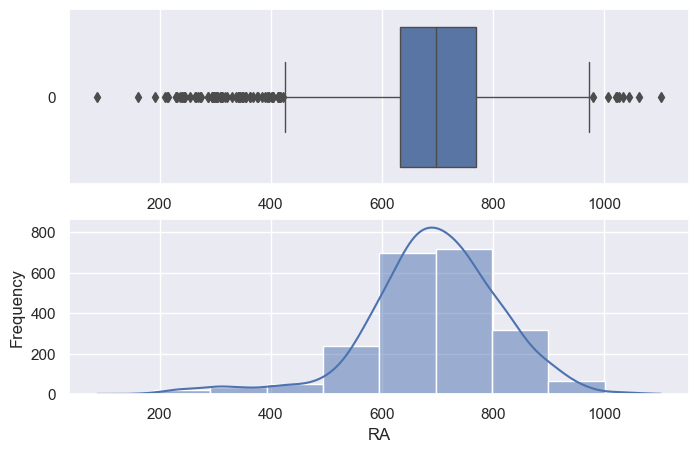

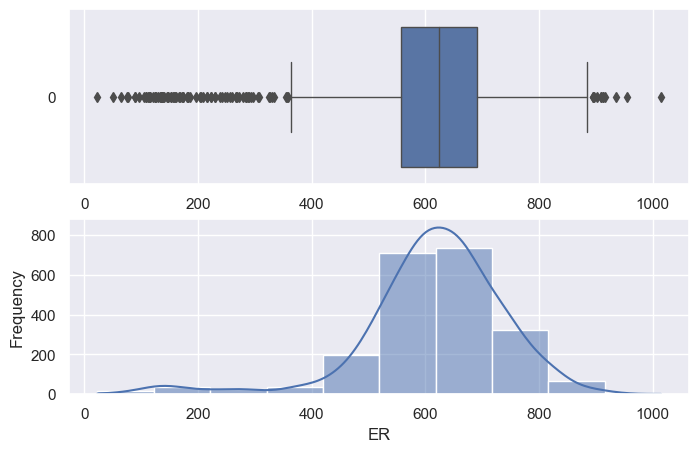

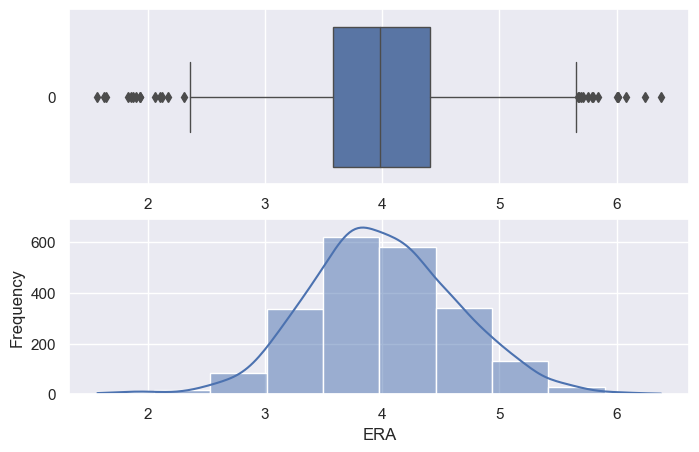

In [10]:
for i in df.columns:
    fig = plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=False)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    #plt.gca().set_title(i)
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0, orient='h')
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)
    plt.close(fig)

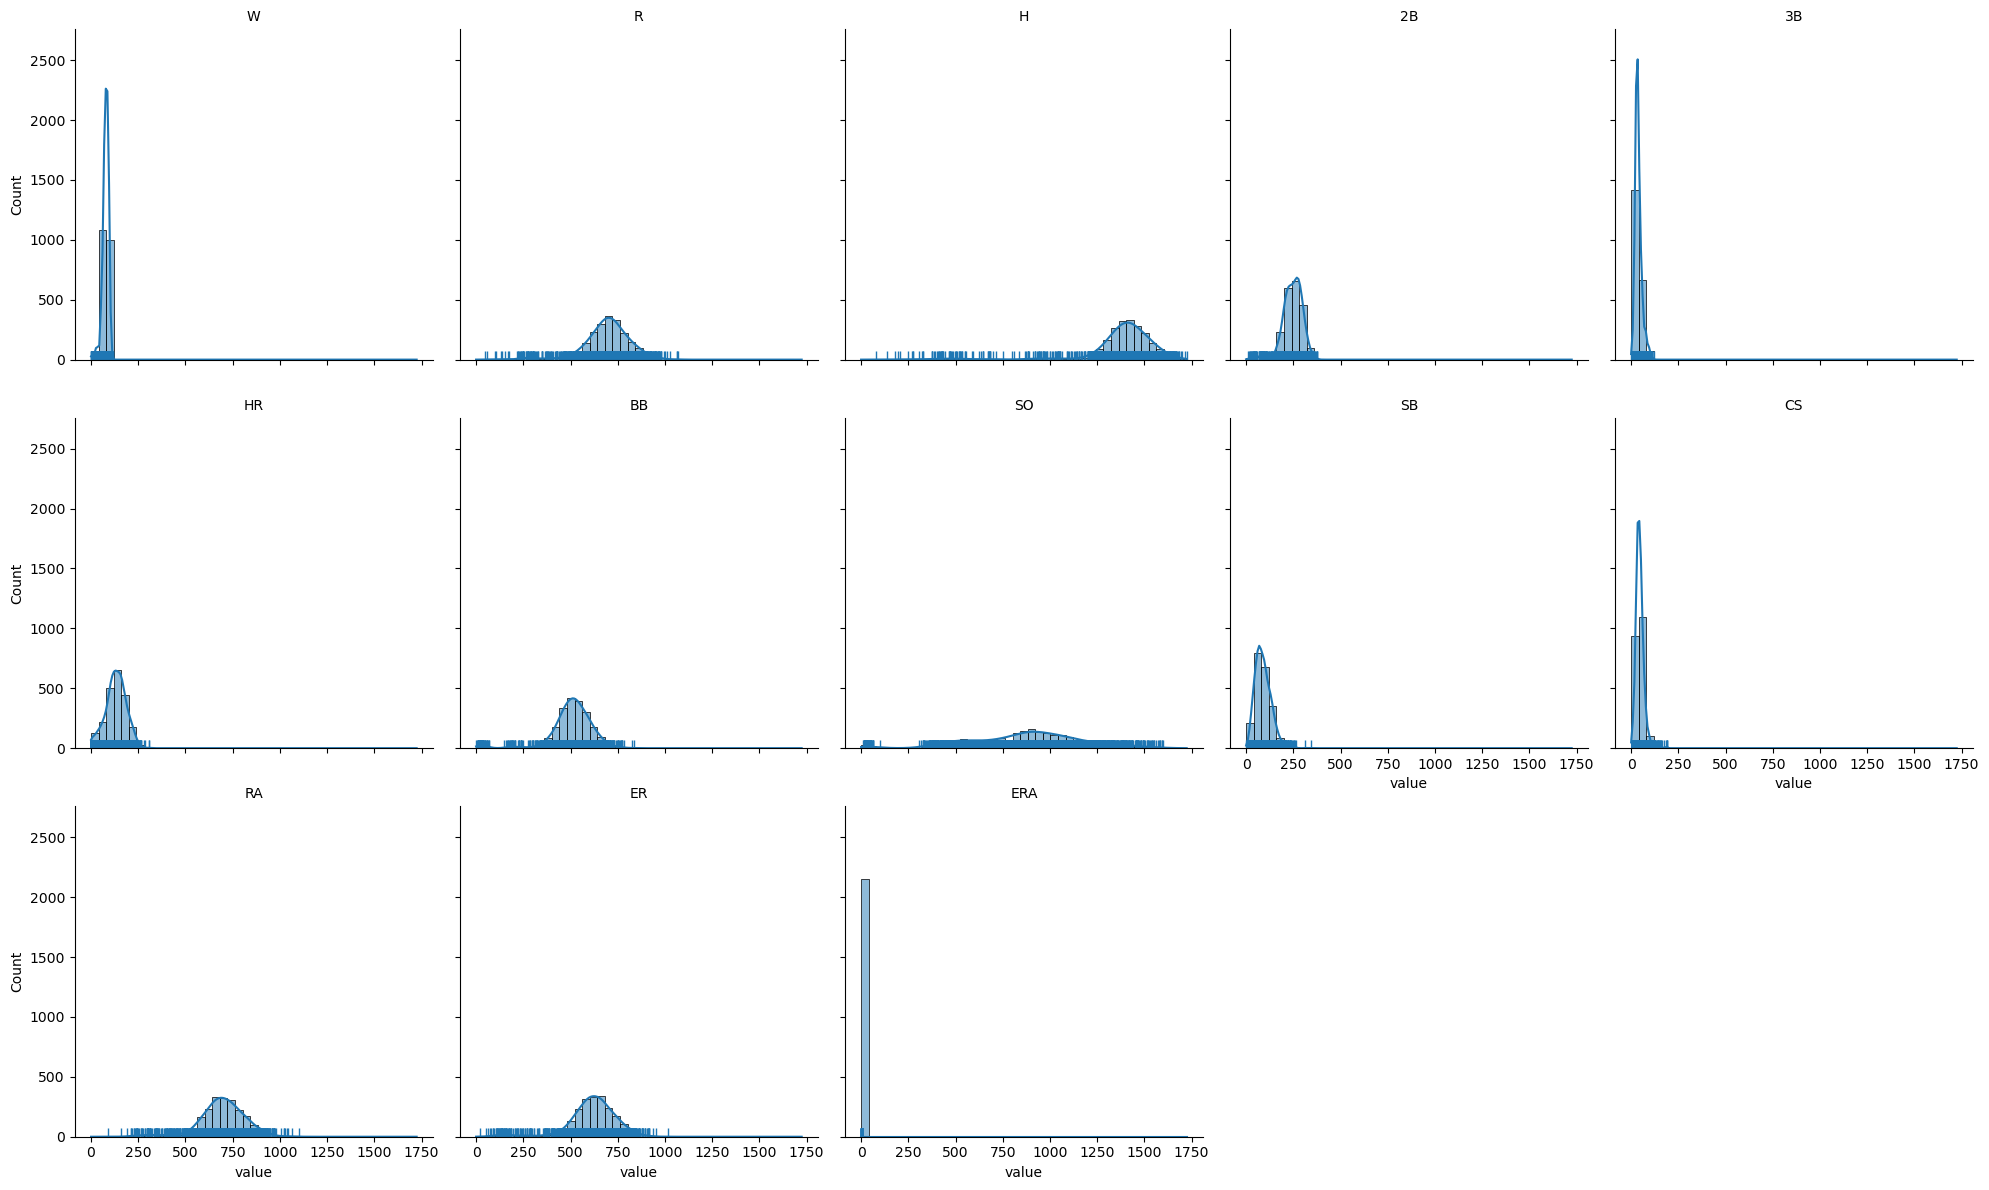

In [7]:
long_df = pd.melt(df)

g = sns.displot(data=long_df, x="value", col="variable", col_wrap=5, rug=True,
                 height=4, aspect=1, kde=True)

g.set_axis_labels("value")
g.set_titles("{col_name}")

# Train Split

In [117]:
X = df.drop(['W'], axis=1).values
y = df['W']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
print(X_train.shape, y_train.shape)

(1506, 12) (1506,)


# Transform

In [140]:
# Original
steps_org = [('imp_num' ,SimpleImputer()),
         ('lasso', Lasso())]
pipeline_org = Pipeline(steps_org)
param_org = {"lasso__alpha": np.linspace(0.001, 1, 400)}

# StandardScaler
steps_sd = [('scaler', StandardScaler()),
         ('imp_num' ,SimpleImputer()),
         ('lasso', Lasso())]
pipeline_sd = Pipeline(steps_sd)
param_sd = {"lasso__alpha": np.linspace(0.001, 1, 400)}

# RobustScaler
steps_rs = [('scaler', RobustScaler()),
         ('imp_num' ,SimpleImputer()),
         ('lasso', Lasso())]
pipeline_rs = Pipeline(steps_rs)
param_rs = {"lasso__alpha": np.linspace(0.001, 1, 400)}


# Normalizer
#steps_norm = [('scaler', Normalizer()),
#         ('imp_num' ,SimpleImputer()),
#         ('lasso', Lasso())]
#pipeline_norm = Pipeline(steps_norm)


# PowerTransformer
steps_pwr = [('scaler', PowerTransformer()),
         ('imp_num' ,SimpleImputer()),
         ('lasso', Lasso())]
pipeline_pwr = Pipeline(steps_pwr)
param_pwr = {"lasso__alpha": np.linspace(0.001, 1, 400)}


# LinearRegression
steps_ln = [('scaler', PowerTransformer()),
         ('imp_num' ,SimpleImputer()),
         ('ln', LinearRegression())]
pipeline_ln = Pipeline(steps_ln)
param_ln = {}


# Ridge
steps_rig = [('scaler', PowerTransformer()),
         ('imp_num' ,SimpleImputer()),
         ('rig', Ridge())]
pipeline_rig = Pipeline(steps_rig)
param_rig = {"rig__alpha" : np.linspace(0.00001, 1, 100)}


# GradientBoostingRegressor
steps_gb = [('scaler', PowerTransformer()),
         ('imp_num' ,SimpleImputer()),
         ('gb', GradientBoostingRegressor())]
pipeline_gb = Pipeline(steps_gb)
param_gb = {'gb__learning_rate': sp_randFloat(),
            'gb__subsample'    : sp_randFloat(),
            'gb__n_estimators' : sp_randInt(100, 500),
            'gb__max_depth'    : sp_randInt(4, 10)}





In [141]:
#pipe_dict = {"orig":pipeline_sd,"sd":pipeline_sd,"rs":pipeline_rs,"norm":pipeline_norm, "pwr":pipeline_pwr}
pipe_dict = {"orig":pipeline_org,"sd":pipeline_sd,"rs":pipeline_rs, "pwr":pipeline_pwr, 'ln':pipeline_ln, 'rig':pipeline_rig, 'gb':pipeline_gb}
param_dict = {"orig":param_org,"sd":param_sd,"rs":param_rs, "pwr":param_pwr, 'ln':param_ln, 'rig':param_rig, 'gb':param_gb}

orig ) Best Accuracy Score:  0.9203    Parameters: {} {'lasso__alpha': 0.008511278195488723}
sd ) Best Accuracy Score:  0.9165    Parameters: {} {'lasso__alpha': 0.24386466165413534}
rs ) Best Accuracy Score:  0.9189    Parameters: {} {'lasso__alpha': 0.046067669172932334}
pwr ) Best Accuracy Score:  0.8601    Parameters: {} {'lasso__alpha': 0.14621804511278197}
ln ) Best Accuracy Score:  0.8674    Parameters: {} {}


/Users/dsimbandumwe/anaconda3/envs/sklearn/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


rig ) Best Accuracy Score:  0.8674    Parameters: {} {'rig__alpha': 0.7777799999999999}
gb ) Best Accuracy Score:  0.9197    Parameters: {} {'gb__learning_rate': 0.048074765486019966, 'gb__max_depth': 6, 'gb__n_estimators': 622, 'gb__subsample': 0.5077335186876315}


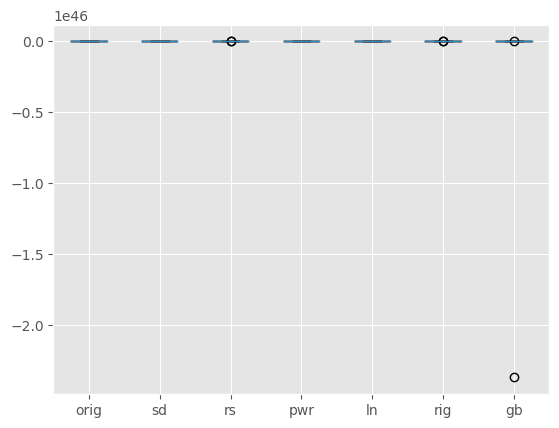

In [142]:
results_lasso = []
n_splits = 10
n_iter=100
random_state=42


# Loop through 
for name, p in pipe_dict.items():
    cv = RandomizedSearchCV(p, param_distributions=param_dict[name])
    cv.fit(X_train,y_train)

    cv_results = cv.cv_results_['mean_test_score']
    results_lasso.append(cv_results)
    
    print(name, ') Best Accuracy Score: ' ,cv.best_score_.round(4), "   Parameters: {}" , cv.best_params_)
    
plt.boxplot(results_lasso, labels=pipe_dict.keys())
plt.show()


## Predict

In [122]:
parameters = {"lasso__alpha": np.linspace(0.001, 1, 400)}

cv = RandomizedSearchCV(pipeline_rs, param_distributions=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

## Performance

In [123]:
# model evaluation for testing set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 3.6397930869644433
MSE is 20.4866994661602
R2 score is 0.9225955128101859


In [124]:
cv.best_params_['lasso__alpha']

0.15122556390977443

Tuned Regression Parameters: {'lasso__alpha': 0.15122556390977443}
Tuned Regression Best Accuracy Score: 0.9179114145086537


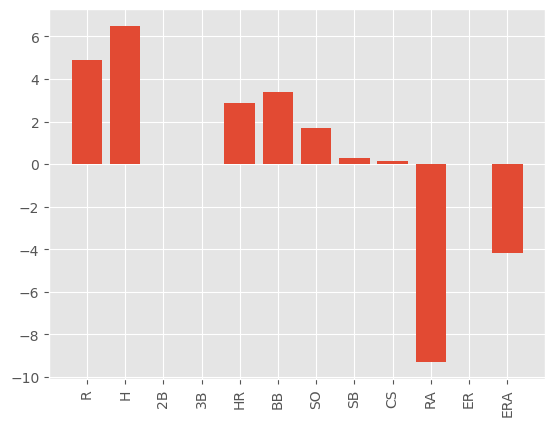

In [125]:
print("Tuned Regression Parameters: {}".format(cv.best_params_))
print("Tuned Regression Best Accuracy Score: {}".format(cv.best_score_))

alpha_fit = cv.best_params_['lasso__alpha']
alpha_fit

names = df.drop("W", axis=1).columns
#lasso = Lasso(alpha=alpha_fit)
lasso_coef = cv.best_estimator_.named_steps.lasso.coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=90)
plt.show()

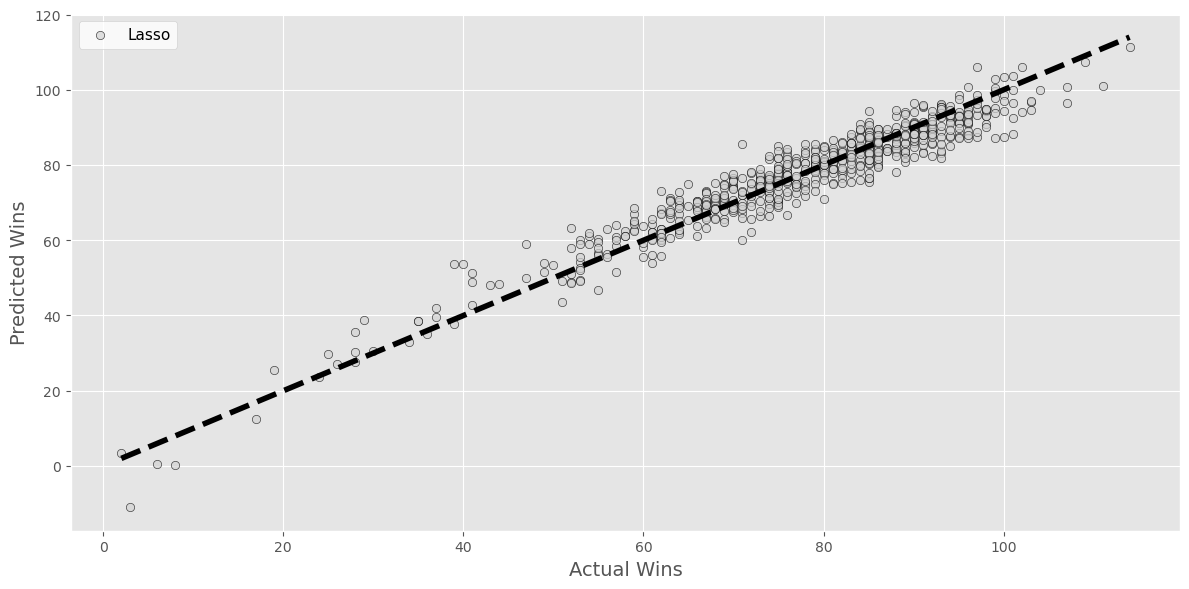

In [126]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(y_test, y_pred, edgecolor='k', facecolor='lightgrey', alpha=0.7, label='Lasso')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_ylabel('Predicted Wins', fontsize=14)
ax.set_xlabel('Actual Wins', fontsize=14)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()